### The following analyzes the time it takes for Separate Chaining and Open Addressing for different lengths of texts.
I started by downloading 101 Gutenburg text files from http://www.textfiles.com/etext/FICTION/. Then I calculated the run time of each file for inserting each word into the table and the average time to access an element in the table. I stored all the data in a file called data.txt.

In [1]:
import pandas as pd
import matplotlib as plt

%matplotlib inline
pd.options.display.max_rows = 105

df = pd.read_csv("data.txt", "|")
df.sort_values("Word Count", ascending=False)

,File,SC Insert (ms),SC Get (ms),OA Insert (ms),OA Get (ms),Word Count
48,bible10.txt,402.8,0.000079,376.2,0.011765,789777
23,anna_karenina.txt,179.8,0.000159,188.8,0.014053,351496
66,burton-arabian-363.txt,110.4,0.000165,109.0,0.009406,214659
56,bronte-jane-178.txt,97.4,0.000196,95.2,0.013247,186700
11,alcott-little-261.txt,95.6,0.000118,94.8,0.011292,186649
21,allflesh.txt,81.2,0.000225,80.8,0.009182,162419
67,butler-way-362.txt,83.2,0.000263,82.2,0.009145,162419
33,austen-emma-754.txt,80.2,0.000151,80.2,0.007024,158172
79,cather-song-367.txt,79.0,0.000150,81.4,0.012700,153322
61,bulwer-last-566.txt,79.8,0.000222,79.6,0.009805,151689


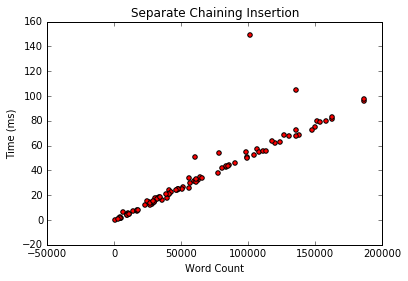

In [2]:
# drop 2 texts that are really long
charts = df[df['Word Count'] < 200000]
charts.plot(kind="scatter", x="Word Count", y="SC Insert (ms)", title="Separate Chaining Insertion", color="red").set_ylabel("Time (ms)")

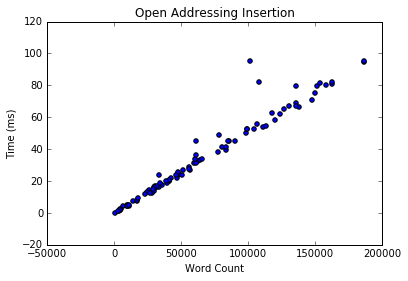

In [3]:
charts.plot(kind="scatter", x="Word Count", y="OA Insert (ms)", title="Open Addressing Insertion").set_ylabel("Time (ms)")

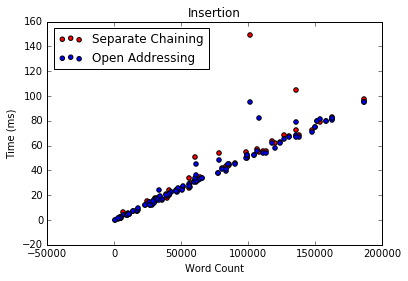

In [4]:
ax = charts.plot(kind="scatter", x="Word Count", y="SC Insert (ms)", title="Separate Chaining Insertion",
                 color="red", label="Separate Chaining")
p = charts.plot(kind="scatter", x="Word Count", y="OA Insert (ms)", title="Insertion",
            label="Open Addressing", ax=ax)

p.legend(bbox_to_anchor=(0.5, 1))
p.set_ylabel("Time (ms)")

For insertion both Separate Chaining and Open Addressing have a similar linear growth and run in about the same time.

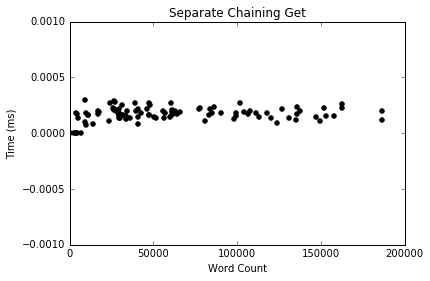

In [5]:
p = charts.plot(kind="scatter", x="Word Count", y="SC Get (ms)", title="Separate Chaining Get", color="black")
p.axis((0, 200000, -.001, .001))
p.set_ylabel("Time (ms)")

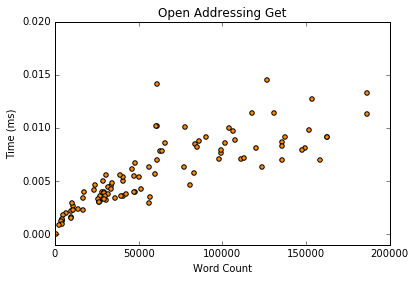

In [6]:
p = charts.plot(kind="scatter", x="Word Count", y="OA Get (ms)", title="Open Addressing Get", color="darkorange")
p.axis((0, 200000, -.001, .020))
p.set_ylabel("Time (ms)")

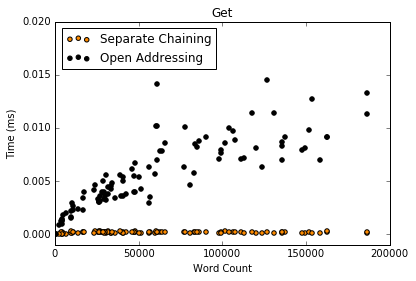

In [7]:
p1 = charts.plot(kind="scatter", x="Word Count", y="SC Get (ms)", color="darkorange", label="Separate Chaining")
p = charts.plot(kind="scatter", x="Word Count", y="OA Get (ms)", title="Get", color="black", label="Open Addressing", ax=p1)
p.axis((0, 200000, -.001, .020))
p.legend(bbox_to_anchor=(0.5, 1))
p.set_ylabel("Time (ms)")

The run time for retrieving a word in both a Separate Chaining and Open Addressing table is very small (only differs by microseconds), but Separate Chaining is slightly faster.

## Conclusion

From the data it looks like for both insertion and deletion, Separate Chaining and Open Addressing run in about the same time. The memory required for storing the data is less for Open Addressing because you don't store each word in a Linked List, so I would choose to use Open Addressing for my hash tables. But the data is pretty inaccurate. All the calculations were measured in milliseconds, and every time I rerun the program, I get a different result. The time it takes to hash each text file would usually fluxuate in a range of about + or - 10 milliseconds every run. Additionally, some of the files would randomly take an unusual amount of time (like double or triple the amount of time it took to run before). Then the next time it would be back to normal. I thought the problem might have been the lack of test cases run, so instead of doing 1 warm up run and 5 tests I increased it to 5 warm up and 50 test runs; but it made no difference.